# Week 4 Notebook 1 Visualizing Distributions

This week we will focus on how we create data visualizations to tell stories about our data.

In this notebook we will explore how to create plots to visualize the distributions:
- histograms
- boxplots
- scatterplots.

We will also try out a new data science library called [Seaborn](https://seaborn.pydata.org/index.html). 

We will use a new data set for the analysis.

**About the Analysis**

The aim of this analysis is to perform the exploratory analysis of a training dataset and get some insights on how each of the variables relate to our target variable which is 'site_eui' (Site Energy Usage Intensity-the amount of heat and electricity consumed by a building). We have about 64 attributes(including the target). The data is obtained from the [Women in Data Science datathon](https://www.widsconference.org/datathon.html).

**WIDS Dataset**

The dataset consists of building characteristics (e.g. floor area, facility type etc), weather data for the location of the building (e.g. annual average temperature, annual total precipitation etc) as well as the energy usage for the building and the given year, measured as Site Energy Usage Intensity (Site EUI). Each row in the data corresponds to the a single building observed in a given year.

The task is to predict the Site EUI for each row, given the characteristics of the building and the weather data for the location of the building. For now, we will just focus on exploring and visualizing the data set.

Let's get started with importing our usual libraries.


In [2]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt

# show plots within this notebook
%matplotlib inline

### Basic Exploration

Let's read in the data set and have a look at it.
It should be in the same directory as this notebook.


In [3]:
# Read in the data set.
wids_train= pd.read_csv('wids-climate-train.csv')
wids_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

There are 64 columns and 75757 rows. 
There appear to be a large number of missing values for the `energy_star_rating` column, so we might want to do something about that.

Let's continue exploring the data first. 

In [4]:
# Check the first five rows
wids_train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


Let's try to analyse the site eui in terms of state, type of building, and year built. 

To try to understand the data, we can check the distribution of the `site_eui` data. This can done using a histogram or boxplot.


**Histogram**

A histogram is a graphical representation that organizes a group of data points into user-specified ranges.Like a bar chart, histograms consist of a series of vertical bars along the x-axis. Histograms are most commonly used to depict what a set of data looks like in aggregate.


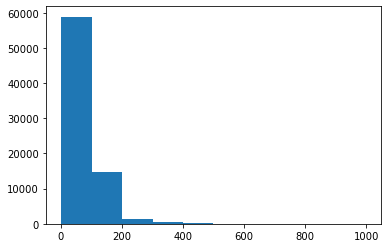

In [5]:
fig, ax = plt.subplots()
plt.hist(wids_train['site_eui'])
plt.show()

We can see that most of the buildings have values between 0 and 100. Let's add more *bins* to see the distribution between 0 and 200 more clearly.


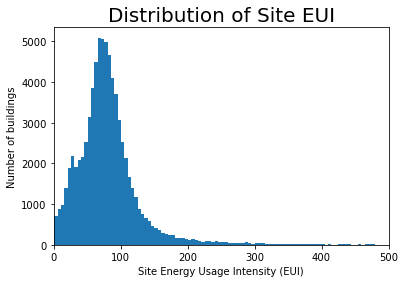

In [6]:
# Create the histogram again, but this time with 200 bins
fig, ax = plt.subplots()
plt.hist(wids_train['site_eui'], bins = 200)
ax.set_title('Distribution of Site EUI', fontsize=20)
ax.set_xlabel('Site Energy Usage Intensity (EUI)')
ax.set_xlim(0,500)
ax.set_ylabel('Number of buildings')
plt.show()

**Boxplot**

Another plot that can be used to visualize the data is a boxplot. A boxplot gives a good indication of how the values in the data are spread out. 

Boxplots are a standardized way of displaying the distribution of data based on a five number summary:
1. minimum value
2. first quartile (Q1)
3. median (Q2)
4. third quartile (Q3)
5. maximum value

We can see these values using the `describe()` method:

In [19]:
# print five number summary of site eui
summary = wids_train['site_eui'].describe()
print(summary)


count    75757.000000
mean        82.584693
std         58.255403
min          1.001169
25%         54.528601
50%         75.293716
75%         97.277534
max        997.866120
Name: site_eui, dtype: float64


82.58469263622104

As you can see the first quartile is indicated as 25%, which means that 25% of the values are below 54.528601, and the median is 75.293716.

Let's try to create a boxplot for the `site_eui`. 

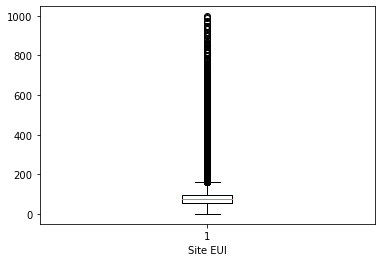

In [7]:
# Create a basic boxplot
fig, ax = plt.subplots()
ax.boxplot(wids_train['site_eui'])
ax.set_xlabel('Site EUI')
plt.show()



The black markers above the boxplot's 'whiskers' are considered *outliers* as they are values that are 1.5 times above the interquartile range. Let's try to take a closer look at the box and whiskers. 

We can do this by limiting the y-axis range.

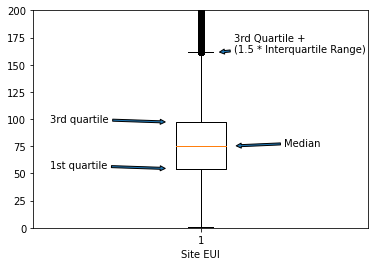

count    75757.000000
mean        82.584693
std         58.255403
min          1.001169
25%         54.528601
50%         75.293716
75%         97.277534
max        997.866120
Name: site_eui, dtype: float64


In [46]:
# Create a basic boxplot
fig, ax = plt.subplots()
ax.boxplot(wids_train['site_eui'])
ax.set_xlabel('Site EUI')

# show y axis from 0 to 200 only to 'zoom in'
ax.set_ylim(0, 200)

# add annotation to mark interquartile range
ax.annotate(xy=(0.90, summary['25%']), xytext=(0.55, summary['25%']), text='1st quartile', arrowprops=dict(arrowstyle='simple'))
ax.annotate(xy=(0.90, summary['75%']), xytext=(0.55, summary['75%']), text='3rd quartile', arrowprops=dict(arrowstyle='simple'))
ax.annotate(xy=(1.1, summary['50%']), xytext=(1.25, summary['50%']), text='Median', arrowprops=dict(arrowstyle='simple'))
# calculate top of IQR
capVal = 1.5 * (summary['75%']- summary['25%']) + summary['75%'] 
ax.annotate(xy=(1.05, capVal), xytext=(1.1, capVal), text='3rd Quartile + \n(1.5 * Interquartile Range)', arrowprops=dict(arrowstyle='simple'))


plt.show()
print(summary)


We can see the box more clearly now, and some annotation has been added to mark the important points on the boxplot.

We can also make the boxplot horizontal setting the `vert` (for vertical) argument to `False`.

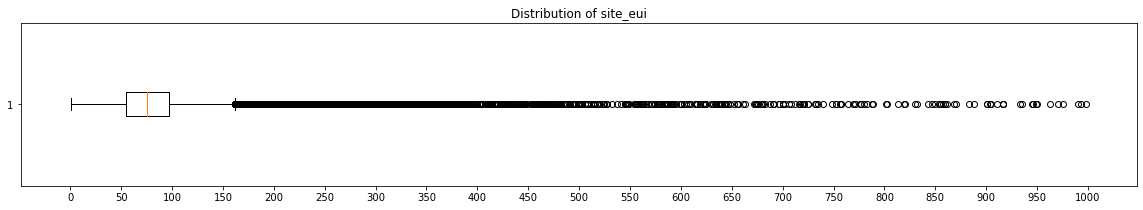

In [47]:
# Create a horizontal boxplot
fig, ax = plt.subplots(figsize=(20,3))
ax.boxplot(wids_train['site_eui'], vert=False)
ax.set_title('Distribution of site EUI')

# add more tick marks
ax.xaxis.set_major_locator(plt.MultipleLocator(50))
plt.show()

### Comparing Site EUI by State

We can compare the distribution of the site_eui using the boxplot, by plotting all the state on the same plot.

In [50]:
# Check how many states there are
states = wids_train['State_Factor'].value_counts()
print(states.index)
print(states)

Index(['State_6', 'State_11', 'State_1', 'State_2', 'State_4', 'State_8',
       'State_10'],
      dtype='object')
State_6     50840
State_11     6412
State_1      5618
State_2      4871
State_4      4300
State_8      3701
State_10       15
Name: State_Factor, dtype: int64


Next we will separate the `site_eui` values for each state, and store them in a dictionary that uses the state name as the key. 

In [52]:
# create a dictionary of for each state's site_eui
statesList={}
# For each state, store the site_eui as the value and the name of the state as the key
for state in states.index:
    statesList[state]=wids_train[wids_train['State_Factor']==state]['site_eui']
# show the dictionary
statesList

{'State_6': 14789     11.776888
 14790     58.700000
 14791     31.109701
 14792     66.285635
 14793     83.013884
             ...    
 65624    114.586066
 65625     79.781421
 65626     58.739071
 65627    181.602459
 65628     54.450820
 Name: site_eui, Length: 50840, dtype: float64,
 'State_11': 69345     23.161815
 69346     45.715030
 69347     51.119336
 69348     19.805635
 69349     29.276630
             ...    
 75752    132.918411
 75753     39.483672
 75754     48.404398
 75755    592.022750
 75756     29.154684
 Name: site_eui, Length: 6412, dtype: float64,
 'State_1': 0       248.682615
 1        26.500150
 2        24.693619
 3        48.406926
 4         3.899395
            ...    
 5613    155.075137
 5614      2.094262
 5615      8.676230
 5616      8.676230
 5617      2.293716
 Name: site_eui, Length: 5618, dtype: float64,
 'State_2': 5618      12.668589
 5619      62.999247
 5620      63.423565
 5621      94.213364
 5622      88.332851
             ...    
 1048

Now we can use Matplotlib to plot each of the state's `site_eui` values.

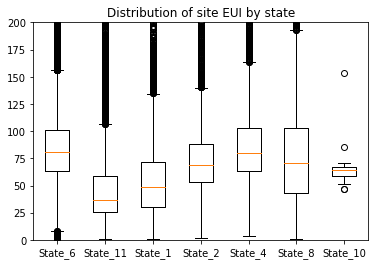

In [57]:
# plot the values stored in the dictionary, by state
fig, ax = plt.subplots()
ax.boxplot(statesList.values(), labels= statesList.keys())
ax.set_ylim(0,200)
ax.set_title("Distribution of site EUI by state")
plt.show()

## Scatter Plots

Scatter plots are useful for comparing numerical data. Each member of the dataset is plotted as a point.
Scatterplots are useful for exploring and visualizing correlations between data.

We have previously created scatterplots using the `plot` method and hiding the lines. However we can also create scatterplots using the `scatter` method in Matplotlib.

Let's create one to compare the `energy_star_rating` and `site_eui` values.


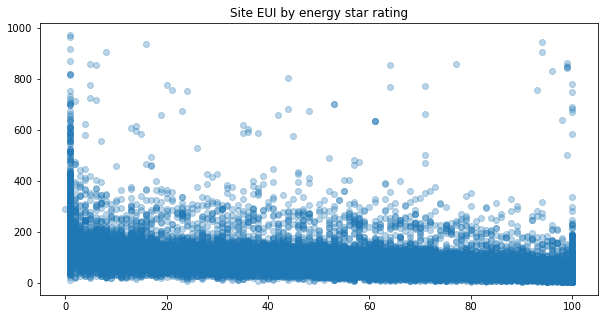

In [28]:
# Create a scatter plot
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(wids_train['energy_star_rating'], wids_train['site_eui'], alpha=0.3)  # alpha to set transparency
ax.set_title('Site EUI by energy star rating')
plt.show()

There are many points on this scatter plot, so the darker points indicate more overlap. Generally we can see that there is a slight decrease in the site EUI values for higher energy star rating values.

### Note on specifying arguments

We have been creating our plots by defining the x or y values using the column names in square brackets, like this: 

`ax.scatter(wids_train['energy_star_rating'], wids_train['site_eui'], alpha=0.3)`

An alternative is to specify the `data=` keyword argument and then the x and y attributes.

`ax.scatter(data = wids_train, x ='energy_star_rating', y='site_eui', alpha=0.3)`

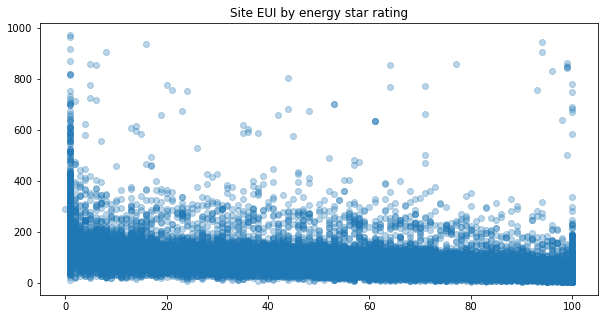

In [50]:
# Create a scatter plot using data= keyword argument
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(data = wids_train, x ='energy_star_rating', y='site_eui', alpha=0.3)
ax.set_title('Site EUI by energy star rating')
plt.show()




So far, we have created some plots to visualize the distribution of the Site EUI, with respect to the states and the energy star rating.

Besides these comparisons, we want to compare the site EUI values based on the state, building class and facility type. 

In order to do this, we might need more sophisticated plotting functions.

In the next notebook we will introduce the Seaborn library for quickly creating some plots to compare the data across categories.

## Exercises

For this exercise we will use the some data on bike rentals from [Capital Bike Share](https://www.capitalbikeshare.com/system-data). 

We have a set of cleaned data about January 2022 rentals in the `bikes_clean.csv` file.

Let's read in the data first. We will *parse* the start and end dates so that they are read in as dates.



In [119]:
date_cols = ['rental_date','started_at', 'ended_at']
bikes = pd.read_csv('bikes_clean.csv', parse_dates = date_cols, dayfirst=True)
bikes.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_in_min,day_of_week
0,5A2157D0EC77FF72,classic,2022-01-01 00:04:00,2022-01-01 00:10:00,Thomas Circle,31241.0,38.905900,-77.032500,38.902760,-77.038630,casual,0 days 00:06:00,6,Saturday
1,19DBFDE1D077F113,electric,2022-01-01 00:05:00,2022-01-01 00:15:00,14th & R St NW,31202.0,38.913055,-77.031823,38.930000,-77.050000,casual,0 days 00:10:00,10,Saturday
2,1B6B8A705833DCE2,docked,2022-01-01 00:06:00,2022-01-01 00:47:00,Massachusetts Ave & Dupont Circle NW,31200.0,38.910100,-77.044400,38.900283,-77.029822,casual,0 days 00:41:00,41,Saturday
3,ED112F28D5F492B8,classic,2022-01-01 00:06:00,2022-01-01 00:20:00,4th St & Madison Dr NW,31288.0,38.890496,-77.017246,38.902400,-77.026220,casual,0 days 00:14:00,14,Saturday
4,6F2C888044490871,classic,2022-01-01 00:06:00,2022-01-01 00:20:00,4th St & Madison Dr NW,31288.0,38.890496,-77.017246,38.902400,-77.026220,casual,0 days 00:14:00,14,Saturday


###  Questions

Q1. Create a histogram for the `duration_in_min` values from the `bikes` data set. 
- Put the data into 200 bins
- adjust the x-axis limits so that the plot is clearer
- Add a title for the figure.

Text(0.5, 1.0, 'Duration of Rental in Minutes')

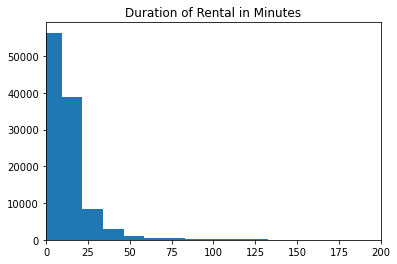

In [120]:
# Q1 Histogram showing distribution of duration in minutes


Q2. Create a ***horizontal*** boxplot for the `duration_in_min` from the `bikes` data set, set the axis from 10 to 100 as it appears most of the data will be within this range.

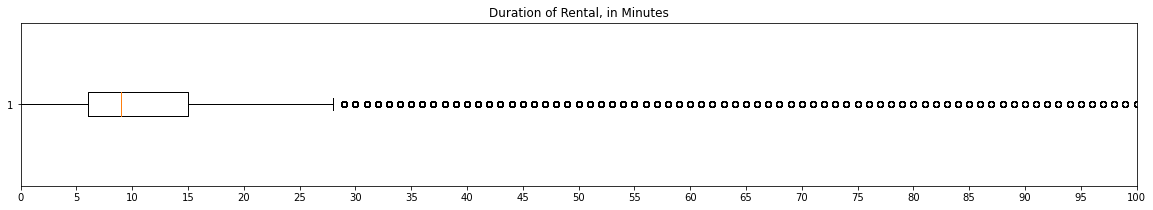

In [121]:
# Q2 Boxplot showing distribution ofduration in minutes
# Create a horizontal boxplot


Q3. Create a scatterplot to compare the `start_lat` on the x-axis with the `start_lng` on the y-axis for the values in the `bikes` data set. Add suitable axis labels and a title. This would give us an idea of the popular locations that the bikes are being rented from.

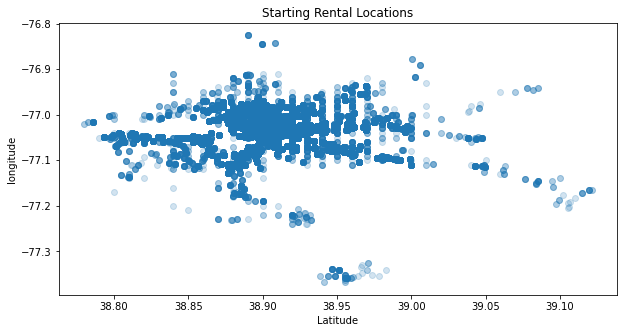

In [112]:
# Q3 Create a scatter plot




Q4. Let's check if there is any difference in the start locations between members and casual users. We have to separate the data into two. 

The set of casual users data is shown as an example. You are required to add the scatter plot for members with a different colour and show the legend.


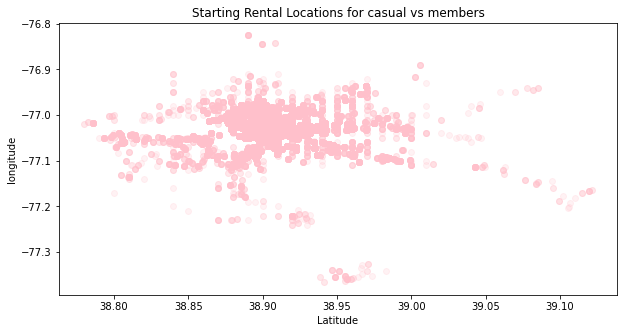

In [147]:
# get casual users
casual_data = bikes[bikes['member_casual']=='casual']


# Q4 Enter your answer to get the member data


# Create a scatter plot 
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(data = casual_data, x = 'start_lat',y='start_lng', alpha=0.2, c= 'pink',  label = 'Casual')  # alpha to set transparency

# add the points for the member data


ax.set_title('Starting Rental Locations for casual vs members')
ax.set_xlabel('Latitude')
ax.set_ylabel('longitude')

# add a statement to show the legend


# show the plot
plt.show()

You might find that the points tend to overlap on top of each other, so the lower layer of values is not clear. We can do this better with the Seaborn library, so we'll cover that in the next notebook.